- Pearson's correlation coefficient or Pearson's r
- compare 2 cont vars

In [34]:
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


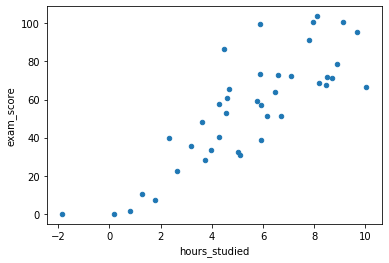

In [4]:
df.plot.scatter(y='exam_score', x='hours_studied')

0. Setup our hypothesis
1. Calculate our test statistic
2. Find a p-value from the test statistic
3. Conclude

- $H_0$: There is no linear relationship between exam score and number of hours studied.
- $H_a$: There is a linear relationship between exam score and number of hours studied.

In [6]:
x = df.hours_studied
y = df.exam_score

$$
r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}
$$

In [10]:
x = df.hours_studied
y = df.exam_score

n = x.shape[0]

r = (
    (((x - x.mean()) * (y - y.mean())).sum() / n)
    /
    (x.std() * y.std())
)

In [11]:
print('n=', n)
print('r=', r)

n= 40
r= 0.8142711078852976


Text(0.5, 1.0, 'Perfect positive correlation, (r=1)')

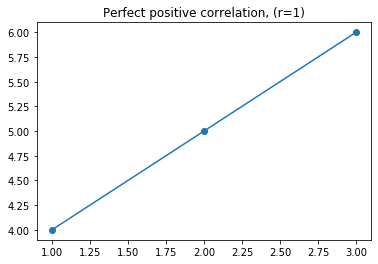

In [14]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)')

Text(0.5, 1.0, 'Perfect negative correlation (r=-1)')

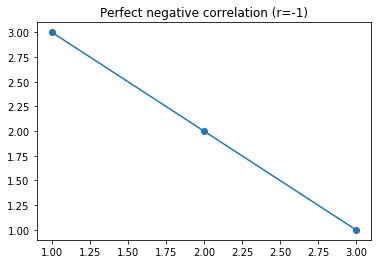

In [15]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)')

r = 0.19049396035063876


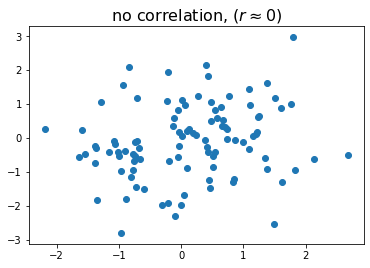

In [30]:
x = np.random.randn(100)
y = np.random.randn(100)

n = x.shape[0]

r = (
    (((x - x.mean()) * (y - y.mean())).sum() / n)
    /
    (x.std() * y.std())
)

plt.scatter(x, y)
plt.title(r'no correlation, ($r \approx 0$)', size=16)
print('r =', r)

Text(0.5, 1.0, 'absolutely no correlation (r=0)')

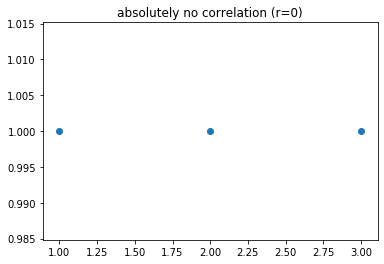

In [32]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.scatter(x, y)
plt.title('absolutely no correlation (r=0)')

$$ t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}} $$

In [43]:
x = df.hours_studied
y = df.exam_score

n = x.shape[0]

r = (
    (((x - x.mean()) * (y - y.mean())).sum() / n)
    /
    (x.std() * y.std())
)

t = (
    (r * sqrt(n - 2))
    /
    sqrt(1 - r**2)
)

p = stats.t(n - 2).sf(t) * 2
print('p=', p)

p= 1.6485895332680445e-10


In [44]:
print('r=', r)

r= 0.8142711078852976


In [42]:
print(f'''
Because p ({p:.11f}) < alpha (.05), we reject the null hypothesis that there is
no linear relationship between exam score and hours studied.
''')


Because p (0.00000000016) < alpha (.05), we reject the null hypothesis that there is
no linear relationship between exam score and hours studied.



In [45]:
r, p = stats.pearsonr(x, y)
print('r=', r)
print('p=', p)

r= 0.8351498542413306
p= 2.0762953315463224e-11


When looking at correlation, keep in mind:

1. Correlation is not causation
2. This is just looking at a linear relationship
3. Correlation itself just looks 2 variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

r= -1.440665053962079e-16


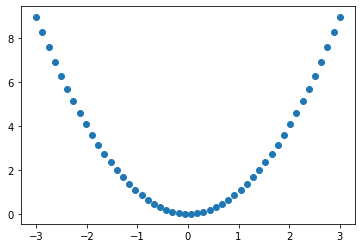

In [49]:
x = np.linspace(-3, 3)
y = x ** 2

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
print('r=', r)

r= -0.9937792168631225


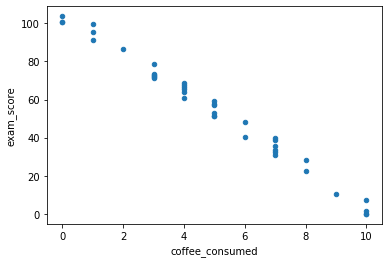

In [52]:
df.plot.scatter(y='exam_score', x='coffee_consumed')

r, p = stats.pearsonr(df.exam_score, df.coffee_consumed)
print('r=', r)

p= 0.0
r= -1.0


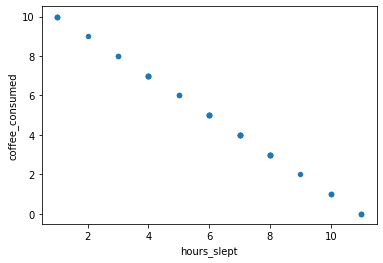

In [55]:
r, p = stats.pearsonr(df.coffee_consumed, df.hours_slept)
df.plot.scatter(y='coffee_consumed', x='hours_slept')
print('p=', p)
print('r=', r)

r= 1.0


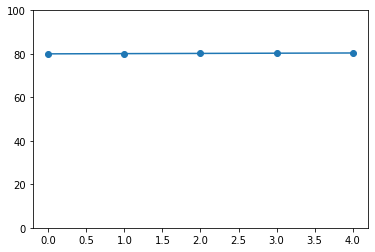

In [58]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

r, p = stats.pearsonr(coffee_consumption, exam_score)

plt.plot(coffee_consumption, exam_score, marker='o')
plt.ylim(0, 100)
print('r=', r)